In [2]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [7]:
finalDB = pd.read_csv('국건영_회귀분석용.csv', encoding = 'euc-kr', low_memory = False)

In [8]:
finalDB

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,LF_SECUR_G,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,DX_F_Ts_A,DX_S_Ts_A,DX_FN_Ts_A
0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,2.0,...,NaN,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505,-0.893139,-0.537667,-1.857823
1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,2.0,...,NaN,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,-1.420957,-1.534783,-2.336729
2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,4.0,...,NaN,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698,1.050435,1.171826,-0.459346
3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,3.0,...,NaN,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,0.961565,0.354087,-0.260561
4,b'2019.03.06.',b'A448740903',2008.0,1.0,1.0,1.0,b'A448',2.0,70.0,2.0,...,NaN,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925,-1.764957,-3.223913,-2.883364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21298,b'2019.03.06.',b'O359840901',2011.0,15.0,1.0,1.0,b'O359',2.0,60.0,1.0,...,NaN,0.785240,0.902542,9391.419342,25933.167250,16812.840990,17517.341590,-0.790261,-1.645652,-2.023738
21299,b'2019.03.06.',b'O359859801',2011.0,15.0,1.0,1.0,b'O359',1.0,68.0,1.0,...,NaN,0.872690,0.953034,7434.439160,34377.940540,11891.414170,12845.828470,-0.588686,-3.072583,-1.048065
21300,b'2019.03.06.',b'O359859802',2011.0,15.0,1.0,1.0,b'O359',2.0,61.0,1.0,...,NaN,0.889561,1.083464,13564.637920,34958.357520,24210.578840,24950.322420,-0.315391,-1.170348,-0.949065
21301,b'2019.03.06.',b'O359920901',2011.0,15.0,1.0,1.0,b'O359',1.0,65.0,1.0,...,NaN,1.028622,1.176135,9776.974162,36100.385010,15916.002950,16825.741910,-1.368321,-1.755417,-1.595887


In [9]:
# 주요변수들 + 총지방량 + 가중치

selected_variables = ['sex',
 'HE_wt',
 'HE_ht',
 'HE_wc',
 'HE_chol',
 'HE_sbp_tr',
 'BS3_1',
 'age', 'wt_itvex', 'DW_WBT_FT']

In [13]:
k = finalDB[selected_variables]
df = k.copy()
df

,sex,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,BS3_1,age,wt_itvex,DW_WBT_FT
0,1.0,58.0,155.2,75.2,144.0,122.3,1.0,70.0,3921.572322,10554.355505
1,2.0,63.4,165.6,87.5,248.0,128.7,8.0,68.0,3547.542445,22368.168979
2,2.0,59.3,152.3,81.0,199.0,133.7,8.0,48.0,13850.745707,23114.327698
3,2.0,53.4,162.5,65.1,200.0,104.7,8.0,35.0,4974.748045,12571.863454
4,2.0,63.9,155.7,86.5,161.0,111.7,8.0,70.0,11619.345735,24379.078925
...,...,...,...,...,...,...,...,...,...,...
21298,2.0,52.2,154.9,70.3,189.0,NaN,8.0,60.0,2947.596354,17517.341590
21299,1.0,68.2,165.2,85.5,199.0,NaN,2.0,68.0,4529.308822,12845.828470
21300,2.0,67.2,160.1,90.0,218.0,NaN,8.0,61.0,2947.596354,24950.322420
21301,1.0,70.5,178.2,88.0,106.0,NaN,2.0,65.0,4529.308822,16825.741910


In [14]:
df.isna().sum()

sex             0
HE_wt          24
HE_ht          23
HE_wc          90
HE_chol      1041
HE_sbp_tr    2765
BS3_1          99
age             0
wt_itvex        0
DW_WBT_FT     464
dtype: int64

In [15]:
# na값 있는 행 전부 drop

df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df

,sex,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,BS3_1,age,wt_itvex,DW_WBT_FT
0,1.0,58.0,155.2,75.2,144.0,122.3,1.0,70.0,3921.572322,10554.355505
1,2.0,63.4,165.6,87.5,248.0,128.7,8.0,68.0,3547.542445,22368.168979
2,2.0,59.3,152.3,81.0,199.0,133.7,8.0,48.0,13850.745707,23114.327698
3,2.0,53.4,162.5,65.1,200.0,104.7,8.0,35.0,4974.748045,12571.863454
4,2.0,63.9,155.7,86.5,161.0,111.7,8.0,70.0,11619.345735,24379.078925
...,...,...,...,...,...,...,...,...,...,...
17151,2.0,75.0,157.9,98.7,187.0,138.9,8.0,76.0,12772.712459,33872.773520
17152,2.0,54.2,152.7,75.3,144.0,88.9,8.0,13.0,15804.024137,22829.630480
17153,1.0,73.0,169.5,92.0,138.0,132.5,2.0,47.0,16574.535478,21495.671590
17154,2.0,62.9,164.4,74.3,144.0,102.9,8.0,20.0,27032.944163,24863.370740


In [16]:
# 9 빼기
df = df.loc[df['BS3_1'] != 9]
df

,sex,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,BS3_1,age,wt_itvex,DW_WBT_FT
0,1.0,58.0,155.2,75.2,144.0,122.3,1.0,70.0,3921.572322,10554.355505
1,2.0,63.4,165.6,87.5,248.0,128.7,8.0,68.0,3547.542445,22368.168979
2,2.0,59.3,152.3,81.0,199.0,133.7,8.0,48.0,13850.745707,23114.327698
3,2.0,53.4,162.5,65.1,200.0,104.7,8.0,35.0,4974.748045,12571.863454
4,2.0,63.9,155.7,86.5,161.0,111.7,8.0,70.0,11619.345735,24379.078925
...,...,...,...,...,...,...,...,...,...,...
17151,2.0,75.0,157.9,98.7,187.0,138.9,8.0,76.0,12772.712459,33872.773520
17152,2.0,54.2,152.7,75.3,144.0,88.9,8.0,13.0,15804.024137,22829.630480
17153,1.0,73.0,169.5,92.0,138.0,132.5,2.0,47.0,16574.535478,21495.671590
17154,2.0,62.9,164.4,74.3,144.0,102.9,8.0,20.0,27032.944163,24863.370740


In [17]:
df['BS3_1'].unique()

array([1., 8., 2.])

### categorical 변수 총 12개

#### BE3_21
1. 전혀하지않음
2. 1일
3. 2일		 
4. 3일
5. 4일		 
6. 5일
7. 6일		 
8. 7일(매일)
88. 비해당	
99. 모름

#### F_BEEF - 소고기섭취빈도
0. 거의 안 먹음 
1. 1년 6-11회  
2. 한달1회
3. 한달2-3회
4. 1주 1회
5. 1주 2-3회
6. 1주 4-6회
7. 하루1회
8. 하루2회
9. 하루3회
99. 모름/무응답

#### pa_high - 격렬한신체활동빈도
1. 격렬한신체활동 1회 20분이상, 주3일이상 실천(문항28-~ & 문항28-1≥20)
0. 격렬한 신체활동을 1회 20분이상, 주3일이상 실천하지 않음

#### DE1_dg - 당뇨병 의사진단여부
1. 있음		
0. 없음
8. 비해당(지금까지 앓은 적 없음)
9. 모름

#### DI1_pt - 고혈압 치료
1. 있음		
0. 없음
8. 비해당(지금까지 앓은 적 없음, 
   현재 앓고 있지 않음)
   
#### BS3_1 - (성인) 현재흡연여부
1. 피움
2. 과거엔 피웠으나, 현재 피우지 않음 
8. 비해당(문항19-③) (피운 적 없음)

#### D_1_1 - 주관적 건강상태
1. 매우 좋음
2. 좋음
3. 보통
4. 나쁨
5. 매우 나쁨  
9. 모름

#### BD1_11 - (만12세이상) 1년간 음주빈도
1. 최근 1년간 전혀 마시지 않았다
2. 월1회미만	
3. 월1회정도
4. 월2-4회	
5. 주2-3회정도
6. 주4회이상
8. 비해당(문항6-)
9. 모름

#### HE_tb - 흉부영상 판독결과
1. 정상
2. 활동성 결핵
3. 결핵의심
4. 비활동성 결핵
5. 심장질환
6. 기타 폐질환
7. 기타소견(비활동성)
8. 폐렴
9. 폐기종
10. 기흉
11. 기타(폐결절,폐암,종격동 질환)

#### DI1_dg - 고혈압 의사진단 여부
1. 있음		
0. 없음
8. 비해당(지금까지 앓은 적 없음)

#### DI3_pt - 뇌졸중 치료
1. 있음		
0. 없음
8. 비해당(지금까지 앓은 적 없음, 
   현재 앓고 있지 않음)
   
#### pa_walk - 걷기 실천율
1. 걷기 1회 30분이상, 주5일이상 실천(문항30-~ & 문항30-1≥30)
0. 걷기 1회 30분이상, 주5일이상 실천하지 않음

#### sex - 성별
1. 남자
2. 여자

In [18]:
dummy_cols = ['sex','BS3_1']
tmp = pd.get_dummies(df, columns = dummy_cols)

In [19]:
tmp

,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,age,wt_itvex,DW_WBT_FT,sex_1.0,sex_2.0,BS3_1_1.0,BS3_1_2.0,BS3_1_8.0
0,58.0,155.2,75.2,144.0,122.3,70.0,3921.572322,10554.355505,1,0,1,0,0
1,63.4,165.6,87.5,248.0,128.7,68.0,3547.542445,22368.168979,0,1,0,0,1
2,59.3,152.3,81.0,199.0,133.7,48.0,13850.745707,23114.327698,0,1,0,0,1
3,53.4,162.5,65.1,200.0,104.7,35.0,4974.748045,12571.863454,0,1,0,0,1
4,63.9,155.7,86.5,161.0,111.7,70.0,11619.345735,24379.078925,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,75.0,157.9,98.7,187.0,138.9,76.0,12772.712459,33872.773520,0,1,0,0,1
17152,54.2,152.7,75.3,144.0,88.9,13.0,15804.024137,22829.630480,0,1,0,0,1
17153,73.0,169.5,92.0,138.0,132.5,47.0,16574.535478,21495.671590,1,0,0,1,0
17154,62.9,164.4,74.3,144.0,102.9,20.0,27032.944163,24863.370740,0,1,0,0,1


In [20]:
df = tmp.copy()

In [21]:
# # Scaling

# scaler = StandardScaler()
# df[df.columns] = scaler.fit_transform(df[df.columns])

In [22]:
# bias를 위한 상수항 추가

df = sm.add_constant(df, has_constant = "add")
df

,const,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,age,wt_itvex,DW_WBT_FT,sex_1.0,sex_2.0,BS3_1_1.0,BS3_1_2.0,BS3_1_8.0
0,1.0,58.0,155.2,75.2,144.0,122.3,70.0,3921.572322,10554.355505,1,0,1,0,0
1,1.0,63.4,165.6,87.5,248.0,128.7,68.0,3547.542445,22368.168979,0,1,0,0,1
2,1.0,59.3,152.3,81.0,199.0,133.7,48.0,13850.745707,23114.327698,0,1,0,0,1
3,1.0,53.4,162.5,65.1,200.0,104.7,35.0,4974.748045,12571.863454,0,1,0,0,1
4,1.0,63.9,155.7,86.5,161.0,111.7,70.0,11619.345735,24379.078925,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,1.0,75.0,157.9,98.7,187.0,138.9,76.0,12772.712459,33872.773520,0,1,0,0,1
17152,1.0,54.2,152.7,75.3,144.0,88.9,13.0,15804.024137,22829.630480,0,1,0,0,1
17153,1.0,73.0,169.5,92.0,138.0,132.5,47.0,16574.535478,21495.671590,1,0,0,1,0
17154,1.0,62.9,164.4,74.3,144.0,102.9,20.0,27032.944163,24863.370740,0,1,0,0,1


In [23]:
df.rename(columns = {'DW_WBT_FT' : '총지방량'}, inplace = True)

In [24]:
### 0930 최종 국건영 2008-2011까지 다 합치고 + dummy 변수까지 생성한 df 
# + 가중치까지 추가

df.to_csv('testdf1001_final.csv', encoding = 'euc-kr', index = False)

In [25]:
df.loc[df['sex_1.0'] == 1]

,const,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,age,wt_itvex,총지방량,sex_1.0,sex_2.0,BS3_1_1.0,BS3_1_2.0,BS3_1_8.0
0,1.0,58.0,155.2,75.2,144.0,122.3,70.0,3921.572322,10554.355505,1,0,1,0,0
5,1.0,56.9,167.3,71.5,142.0,144.3,75.0,4459.931773,10973.370359,1,0,0,0,1
7,1.0,64.4,172.0,75.5,167.0,93.3,42.0,8789.199293,13025.321835,1,0,0,0,1
8,1.0,75.0,173.0,93.5,165.0,149.3,44.0,8789.199293,15516.731484,1,0,1,0,0
9,1.0,116.9,186.7,105.3,148.0,140.3,20.0,14187.474181,35297.363549,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17143,1.0,73.8,168.0,95.6,171.0,155.5,63.0,16361.571537,21939.460290,1,0,1,0,0
17145,1.0,96.0,174.2,107.0,212.0,148.5,39.0,16549.587671,27969.597780,1,0,0,1,0
17147,1.0,66.8,163.3,84.6,160.0,101.5,47.0,15250.013744,23666.906780,1,0,1,0,0
17150,1.0,42.8,146.1,61.6,136.0,95.5,14.0,11716.735554,12746.500160,1,0,0,0,1


In [17]:
df.loc[df['sex_2.0'] == 1]

,const,HE_wt,HE_ht,HE_wc,HE_chol,N_NA,HE_sbp_tr,age,총지방량,sex_1.0,...,DI1_dg_0.0,DI1_dg_1.0,DI1_dg_8.0,DI1_dg_9.0,DI3_pt_0.0,DI3_pt_1.0,DI3_pt_8.0,DI3_pt_9.0,pa_walk_0.0,pa_walk_1.0
1,1.0,63.4,165.6,87.5,248.0,4430.090787,128.7,68.0,22368.168979,0,...,0,0,1,0,0,0,1,0,0,1
2,1.0,53.4,162.5,65.1,200.0,2684.503728,104.7,35.0,12571.863454,0,...,0,0,1,0,0,0,1,0,1,0
4,1.0,47.2,147.8,74.6,193.0,4244.231646,144.7,74.0,13660.886036,0,...,0,0,1,0,0,0,1,0,0,1
8,1.0,50.1,150.3,79.1,167.0,2458.191148,128.7,55.0,17693.471953,0,...,0,0,1,0,0,0,1,0,1,0
9,1.0,51.6,158.4,65.2,131.0,3163.555059,98.7,26.0,17630.586715,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13258,1.0,58.2,159.9,76.3,229.0,5657.930302,111.9,41.0,21307.018780,0,...,0,0,1,0,0,0,1,0,1,0
13260,1.0,63.1,155.9,85.5,142.0,2914.282072,91.9,35.0,23293.178860,0,...,0,0,1,0,0,0,1,0,1,0
13262,1.0,66.2,153.4,86.3,204.0,5591.752094,146.9,61.0,27378.956380,0,...,0,1,0,0,0,0,1,0,1,0
13264,1.0,43.6,148.8,64.8,172.0,3486.427392,97.9,43.0,11928.305590,0,...,0,0,1,0,0,0,1,0,1,0


In [18]:
## 남녀 df 나누기

df_men = df.loc[df['sex_1.0'] == 1]
df_women = df.loc[df['sex_2.0'] == 1]

In [20]:
# sex column drop

df_men.drop(['sex_1.0'], axis = 1, inplace = True)
df_men

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,const,HE_wt,HE_ht,HE_wc,HE_chol,N_NA,HE_sbp_tr,age,총지방량,sex_2.0,...,DI1_dg_0.0,DI1_dg_1.0,DI1_dg_8.0,DI1_dg_9.0,DI3_pt_0.0,DI3_pt_1.0,DI3_pt_8.0,DI3_pt_9.0,pa_walk_0.0,pa_walk_1.0
0,1.0,58.0,155.2,75.2,144.0,7472.249217,122.3,70.0,10554.355505,0,...,0,0,1,0,0,0,1,0,0,1
3,1.0,56.9,167.3,71.5,142.0,4976.170950,144.3,75.0,10973.370359,0,...,0,0,1,0,0,0,1,0,0,1
5,1.0,75.0,173.0,93.5,165.0,5475.268325,149.3,44.0,15516.731484,0,...,0,0,1,0,0,0,1,0,0,1
6,1.0,116.9,186.7,105.3,148.0,4573.006235,140.3,20.0,35297.363549,0,...,0,1,0,0,0,0,1,0,1,0
7,1.0,68.7,172.0,85.1,221.0,4751.274527,117.3,57.0,19730.524888,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,1.0,62.1,164.5,83.5,254.0,6427.799747,99.5,55.0,15963.899650,0,...,0,0,1,0,0,0,1,0,0,1
13254,1.0,73.8,160.8,94.2,245.0,4593.166096,145.5,70.0,24204.058440,0,...,0,1,0,0,0,0,1,0,1,0
13259,1.0,64.2,163.3,78.2,222.0,7280.110487,110.5,36.0,13080.741210,0,...,0,0,1,0,0,0,1,0,1,0
13261,1.0,73.8,168.0,95.6,171.0,8845.905982,155.5,63.0,21939.460290,0,...,0,1,0,0,0,0,1,0,1,0


In [21]:
# sex column drop

df_women.drop(['sex_2.0'], axis = 1, inplace = True)
df_women

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,const,HE_wt,HE_ht,HE_wc,HE_chol,N_NA,HE_sbp_tr,age,총지방량,sex_1.0,...,DI1_dg_0.0,DI1_dg_1.0,DI1_dg_8.0,DI1_dg_9.0,DI3_pt_0.0,DI3_pt_1.0,DI3_pt_8.0,DI3_pt_9.0,pa_walk_0.0,pa_walk_1.0
1,1.0,63.4,165.6,87.5,248.0,4430.090787,128.7,68.0,22368.168979,0,...,0,0,1,0,0,0,1,0,0,1
2,1.0,53.4,162.5,65.1,200.0,2684.503728,104.7,35.0,12571.863454,0,...,0,0,1,0,0,0,1,0,1,0
4,1.0,47.2,147.8,74.6,193.0,4244.231646,144.7,74.0,13660.886036,0,...,0,0,1,0,0,0,1,0,0,1
8,1.0,50.1,150.3,79.1,167.0,2458.191148,128.7,55.0,17693.471953,0,...,0,0,1,0,0,0,1,0,1,0
9,1.0,51.6,158.4,65.2,131.0,3163.555059,98.7,26.0,17630.586715,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13258,1.0,58.2,159.9,76.3,229.0,5657.930302,111.9,41.0,21307.018780,0,...,0,0,1,0,0,0,1,0,1,0
13260,1.0,63.1,155.9,85.5,142.0,2914.282072,91.9,35.0,23293.178860,0,...,0,0,1,0,0,0,1,0,1,0
13262,1.0,66.2,153.4,86.3,204.0,5591.752094,146.9,61.0,27378.956380,0,...,0,1,0,0,0,0,1,0,1,0
13264,1.0,43.6,148.8,64.8,172.0,3486.427392,97.9,43.0,11928.305590,0,...,0,0,1,0,0,0,1,0,1,0


In [26]:
df_all = df.copy()

In [81]:
# df_all.to_csv('test0930.csv', encoding = 'euc-kr', index = False)

In [85]:
df = df_all.copy()

In [56]:
df = df_men.copy()

In [70]:
df = df_women.copy()

In [27]:
df

,const,HE_wt,HE_ht,HE_wc,HE_chol,HE_sbp_tr,age,wt_itvex,총지방량,sex_1.0,sex_2.0,BS3_1_1.0,BS3_1_2.0,BS3_1_8.0
0,1.0,58.0,155.2,75.2,144.0,122.3,70.0,3921.572322,10554.355505,1,0,1,0,0
1,1.0,63.4,165.6,87.5,248.0,128.7,68.0,3547.542445,22368.168979,0,1,0,0,1
2,1.0,59.3,152.3,81.0,199.0,133.7,48.0,13850.745707,23114.327698,0,1,0,0,1
3,1.0,53.4,162.5,65.1,200.0,104.7,35.0,4974.748045,12571.863454,0,1,0,0,1
4,1.0,63.9,155.7,86.5,161.0,111.7,70.0,11619.345735,24379.078925,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17151,1.0,75.0,157.9,98.7,187.0,138.9,76.0,12772.712459,33872.773520,0,1,0,0,1
17152,1.0,54.2,152.7,75.3,144.0,88.9,13.0,15804.024137,22829.630480,0,1,0,0,1
17153,1.0,73.0,169.5,92.0,138.0,132.5,47.0,16574.535478,21495.671590,1,0,0,1,0
17154,1.0,62.9,164.4,74.3,144.0,102.9,20.0,27032.944163,24863.370740,0,1,0,0,1


In [28]:
## Stepwise selection

variables = df.columns.tolist() ## 설명 변수 리스트
variables.remove('총지방량') # 반응변수 제거
print(variables)
 
y = df['총지방량'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

['const', 'HE_wt', 'HE_ht', 'HE_wc', 'HE_chol', 'HE_sbp_tr', 'age', 'wt_itvex', 'sex_1.0', 'sex_2.0', 'BS3_1_1.0', 'BS3_1_2.0', 'BS3_1_8.0']


<ipython-input-28-17e21ea7112c>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-28-17e21ea7112c>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-28-17e21ea7112c>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-28-17e21ea7112c>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

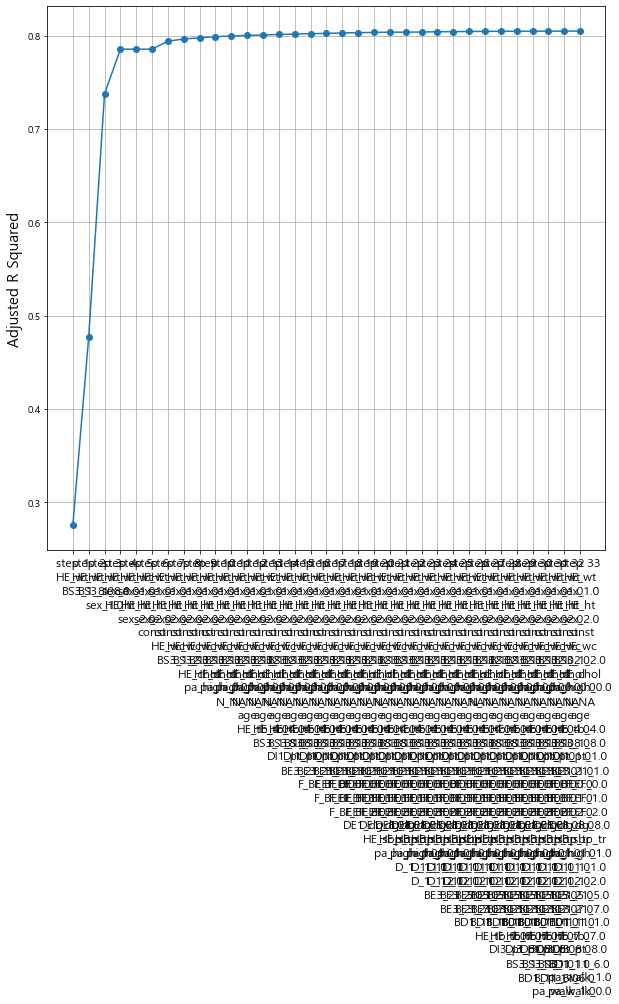

In [88]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
# for i in range(len(sv_per_step)): 
#     print(sv_per_step[i])

In [29]:
selected_variables

['sex_1.0',
 'HE_wt',
 'HE_wc',
 'const',
 'HE_ht',
 'sex_2.0',
 'age',
 'BS3_1_1.0',
 'HE_chol',
 'BS3_1_2.0',
 'BS3_1_8.0',
 'HE_sbp_tr']

In [ ]:
###########

In [28]:
variable_all = selected_variables

In [36]:
variable_men = selected_variables

In [45]:
variable_women = selected_variables

In [ ]:
############

In [30]:
# 선택된 변수들 중 주요변수들만 추출 - ALL

selected_variables = ['const', 'wt_itvex', 'HE_wt', 'BS3_1_1.0', 'BS3_1_8.0', 'HE_ht', 'sex_1.0', 'sex_2.0', 'HE_wc', 'HE_chol','age', 'HE_sbp_tr']

In [65]:
# 선택된 변수들 중 주요변수들만 추출 - Men

selected_variables = ['const', 'HE_wt', 'BS3_1_1.0', 'BS3_1_8.0', 'HE_ht', 'HE_wc', 'HE_chol','age']

In [75]:
# 선택된 변수들 중 주요변수들만 추출 - Women

selected_variables = ['const', 'HE_wt', 'BS3_1_1.0', 'BS3_1_8.0', 'HE_ht', 'HE_wc', 'HE_chol','age']

In [62]:
# # 남자의 경우 const가 선택이 안됨 - select 된 변수들로 돌릴때
# # 임의로 넣어주기

# selected_variables.append('const')

In [31]:
# train test split - 종속변수가 총지방량일때 
# using selected variables

feature_columns = df.columns.difference(["총지방량"]) # Target column 빼기
feature_columns = selected_variables

X_fat = df[feature_columns]
y_fat = df.총지방량

train_x_fat, test_x_fat, train_y_fat, test_y_fat = train_test_split(X_fat,y_fat, train_size = 0.7, test_size = 0.3)

print(train_x_fat.shape, test_x_fat.shape, train_y_fat.shape, test_y_fat.shape)

(12001, 12) (5144, 12) (12001,) (5144,)


In [32]:
# X_col&지방량 OLS

model = sm.OLS(train_y_fat,train_x_fat)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총지방량   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     4566.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:13:21   Log-Likelihood:            -1.1159e+05
No. Observations:               12001   AIC:                         2.232e+05
Df Residuals:                   11990   BIC:                         2.233e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.017e+04    576.697     17.629      0.000    9036.052    1.13e+04
wt_itvex      -0.0128      0.007     -1.724      0.085      -0.027       0.002
HE_wt        405.0312      5.775     70.134      0.000     393.711     416.351
BS3_1_1.0  -1301.5962    102.782    -12.664      0.000   -1503.065   -1100.127
BS3_1_8.0   -298.5347    108.608     -2.749      0.006    -511.423     -85.646
HE_ht       -198.1431      4.985    -39.749      0.000    -207.914    -188.372
sex_1.0     2166.2691    304.536      7.113      0.000    1569.330    2763.208
sex_2.0     8000.2023    276.366     28.948      0.000    7458.481    8541.924
HE_wc        134.9656      5.663     23.831      0.000     123.864     146.067
HE_chol        5.0057      0.712      7.027      0.000       3.609       6.402
age          -38.4685      1.953    -19.699      0.000     -42.296     -34.641
HE_sbp_tr     -4.6407      1.672     -2.776      0.006      -7.918      -1.363
==============================================================================
Omnibus:                      205.198   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.217
Skew:                           0.127   Prob(JB):                     3.65e-79
Kurtosis:                       3.811   Cond. No.                     2.06e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [98]:
df

,const,HE_wt,HE_ht,HE_wc,HE_chol,N_NA,HE_sbp_tr,age,총지방량,sex_1.0,...,DI1_dg_0.0,DI1_dg_1.0,DI1_dg_8.0,DI1_dg_9.0,DI3_pt_0.0,DI3_pt_1.0,DI3_pt_8.0,DI3_pt_9.0,pa_walk_0.0,pa_walk_1.0
0,1.0,58.0,155.2,75.2,144.0,7472.249217,122.3,70.0,10554.355505,1,...,0,0,1,0,0,0,1,0,0,1
1,1.0,63.4,165.6,87.5,248.0,4430.090787,128.7,68.0,22368.168979,0,...,0,0,1,0,0,0,1,0,0,1
2,1.0,53.4,162.5,65.1,200.0,2684.503728,104.7,35.0,12571.863454,0,...,0,0,1,0,0,0,1,0,1,0
3,1.0,56.9,167.3,71.5,142.0,4976.170950,144.3,75.0,10973.370359,1,...,0,0,1,0,0,0,1,0,0,1
4,1.0,47.2,147.8,74.6,193.0,4244.231646,144.7,74.0,13660.886036,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13261,1.0,73.8,168.0,95.6,171.0,8845.905982,155.5,63.0,21939.460290,1,...,0,1,0,0,0,0,1,0,1,0
13262,1.0,66.2,153.4,86.3,204.0,5591.752094,146.9,61.0,27378.956380,0,...,0,1,0,0,0,0,1,0,1,0
13263,1.0,96.0,174.2,107.0,212.0,3365.945679,148.5,39.0,27969.597780,1,...,0,1,0,0,0,0,1,0,0,1
13264,1.0,43.6,148.8,64.8,172.0,3486.427392,97.9,43.0,11928.305590,0,...,0,0,1,0,0,0,1,0,1,0


In [93]:
# prediction

pre_y_fat=fitted_model.predict(test_x_fat) 

In [94]:
# RMSE

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(test_y_fat, pre_y_fat) 
np.sqrt(MSE)

2557.4851174615733

In [95]:
# r2 score

from sklearn.metrics import r2_score
r2_score(test_y_fat, pre_y_fat)

0.7961511846185667

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


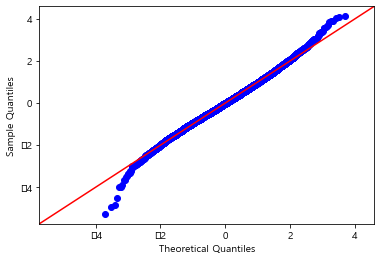

In [96]:
# 학습데이터의 잔차 확인

res = fitted_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

In [ ]:
set(variable_all) - set(variable_men)

In [ ]:
set(variable_men) - set(variable_all)

In [ ]:
set(variable_all) - set(variable_women)